In [534]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
from scipy.stats import norm

In [535]:
mu = 60
c = 2
std = np.sqrt(c * mu**2)
dist = norm(mu, std)

In [536]:
def calculate_L(data, mu, c):
    n = len(data)
    log_like = -n/2*np.log(mu**2) - 1/(2*c*mu**2) * np.sum((data-mu)**2)
    return log_like

def find_mle(samples, c):
    if np.sum(samples) < 0:
        num =  -np.sum(samples) - np.sqrt(np.sum(samples)**2 + 4 * len(samples) * c * np.sum(samples**2))
    else:
        num =  -np.sum(samples) + np.sqrt(np.sum(samples)**2 + 4 * len(samples) * c * np.sum(samples**2))
    den = 2 * len(samples) * c
    mle = num / den
    return mle

In [537]:
samples = norm(mu, std).rvs(10000)
find_mle(samples, c)

59.64369071485836

In [538]:
MLEs = []
for it in range(1000):
    samples = norm(mu, std).rvs(10000)
    MLEs.append(find_mle(samples, c))

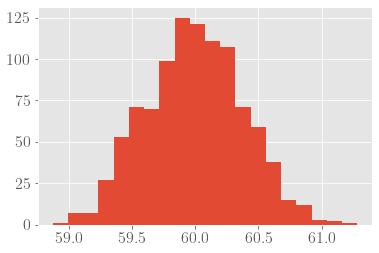

In [539]:
plt.hist(MLEs, bins=20);

In [540]:
np.var(MLEs)

0.14556162893373922

In [544]:
def calculate_se(samples, mle):
    n = len(samples)
    info = -(n/mle**2 - 1/(2*c) * (6*np.sum(samples**2)/mle**4 - 4 * np.sum(samples)/mle**3))
    info = n/mle**2 - 3*n/mle**2 - n/(mle**2*c)
    return -1/info

In [545]:
calculate_se(samples, find_mle(samples, c))

0.14252731085071702

-20.0
-14.94523272729619


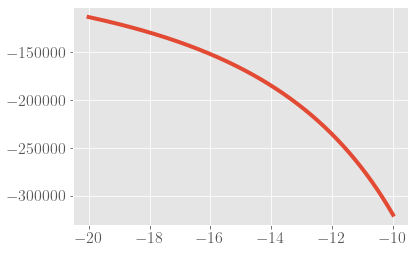

In [543]:
x = np.linspace(-10, -20, 1000)
like = [calculate_L(samples, mu, c) for mu in x]
plt.plot(x,like)
print(x[np.argmax(like)])
print(mle)

(array([  23.,  145.,  716., 1894., 2980., 2509., 1287.,  382.,   60.,
           4.]),
 array([-12.61312824,  -9.34541008,  -6.07769193,  -2.80997377,
          0.45774438,   3.72546254,   6.9931807 ,  10.26089885,
         13.52861701,  16.79633516,  20.06405332]),
 <BarContainer object of 10 artists>)

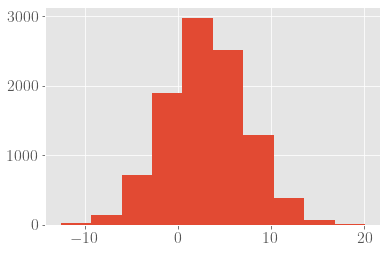

In [438]:
plt.hist(samples)

In [335]:
num =  np.sum(samples) - np.sqrt(np.sum(samples)**2 - 4 * len(samples) * c * np.sum(samples**2))
den = 2 * len(samples) * c
mle = num / den

In [336]:
mle

5.108125576259226

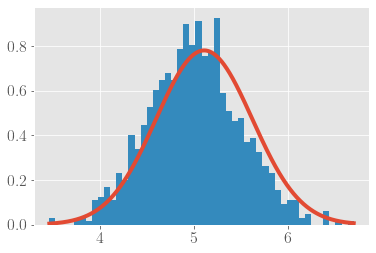

In [337]:
x = np.linspace(samples.min(), samples.max(), 1000)
plt.plot(x, norm(mle, np.sqrt(mle**2 * c)).pdf(x))
plt.hist(samples, density=True, bins=50);

In [338]:
np.sum(samples)**2 - 4 * len(samples) * c * np.sum(samples**2)

24079877.48769666

In [339]:
np.sum(samples)**2 - 4 * len(samples) * c * np.sum(samples**2)

24079877.48769666

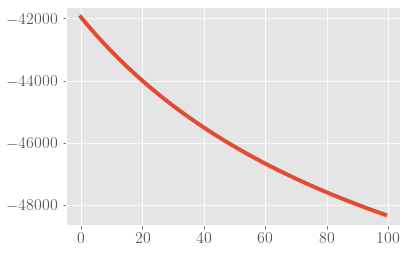

40.0

102.16251152518453